In [2]:
#Exercise 2 (Chapter 2 p. 52)
#a. prediction
#b. inference
#c. prediction

In [3]:
# Set environment params
Sys.setenv(LANG='en')  # English

# Import libraries
library(data.table)  # Data manipulate
library(mlr)         # ML toolkit
library(caret)       # ML toolkit
library(ggplot2)     # Visualization
library(plotrix)     # Draw circle
library(rgl)         # 3D plots

# Dataset
library(ISLR)      # Data from the course book
library(MASS)      # Boston housing dataset
library(datasets)  # US crime dataset

# Resize plot
library(repr)  # String and binary representations
# options(repr.plot.width=4, repr.plot.height=4)

R.version.string

Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.

Loading required package: ggplot2

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:mlr':

    train



Attaching package: 'rgl'


The following object is masked from 'package:plotrix':

    mtext3d




[1] "R version 4.0.5 (2021-03-31)"

In [18]:
library(MASS)
head(Boston)
?Boston
#Exercise 10 (Chapter 2 p. 56)
#a. the dataset contains 506 rows and 14 columns
#Dataset represents the Housing Values in Suburbs of Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


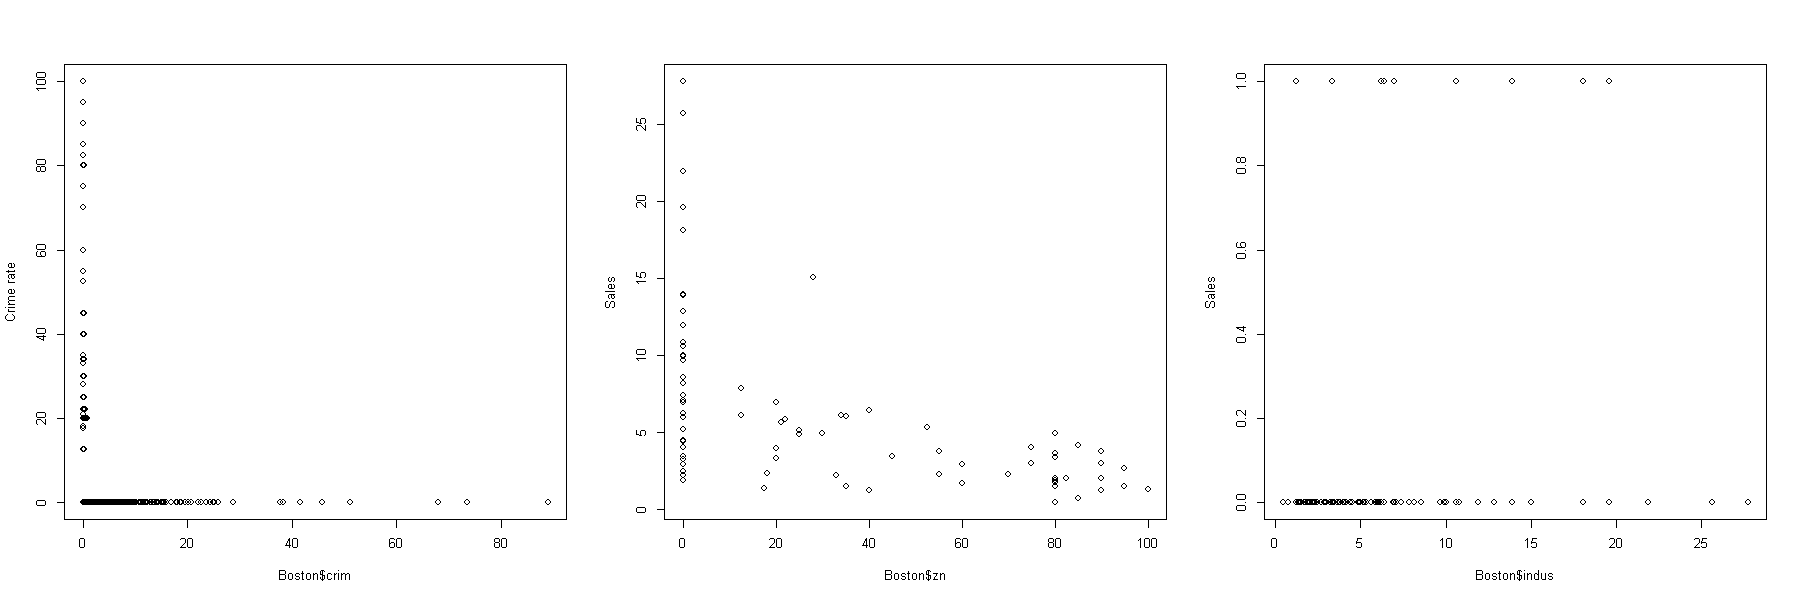

In [11]:
#b.  Plot the data
options(repr.plot.width=15, repr.plot.height=5)  # Set plot size
par(mfrow=c(1, 3))  # Set the plot regions

plot(Boston$crim, Boston$zn, ylab="Crime rate")
#they are not really related

plot(Boston$zn, Boston$indus, ylab="Sales")
#they are related to each other

plot(Boston$indus, Boston$chas, ylab="Sales")
#not really related

In [15]:
md <- lm(crim ~ indus, data=Boston)
summary(md)
#c. there is relation between crime rate per capita  and proportion of residential land as p-value <0.05 and t-value is not small


Call:
lm(formula = crim ~ indus, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.972  -2.698  -0.736   0.712  81.813 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.06374    0.66723  -3.093  0.00209 ** 
indus        0.50978    0.05102   9.991  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.866 on 504 degrees of freedom
Multiple R-squared:  0.1653,	Adjusted R-squared:  0.1637 
F-statistic: 99.82 on 1 and 504 DF,  p-value: < 2.2e-16


In [17]:
summary(Boston)
#d. Yes, they have high values of predicators mentioned. Ranges are:
# crime rates = 88.96
# Tax rates = 524
# Pupil-Teacher Ratio = 9.4
#Below is all the summary

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [34]:
library(plyr)
count(Boston$chas == 1)
#e. there are 35 suburbs of Boston bound to the Charles river

x,freq
<lgl>,<int>
FALSE,471
TRUE,35


In [35]:
summary(Boston$ptratio)
#f. median pupil-teacher ratio is 19.05

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.60   17.40   19.05   18.46   20.20   22.00 

In [47]:
min(Boston$medv)
#g. the lowest median value of owner-occpied homes is 5
#the suburbs having this minimum values are:
library(dplyr)
Boston %>% filter(Boston$medv == min(Boston$medv))


Attaching package: 'dplyr'


The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from 'package:MASS':

    select


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
38.3518,0,18.1,0,0.693,5.453,100,1.4896,24,666,20.2,396.90,30.59,5
67.9208,0,18.1,0,0.693,5.683,100,1.4254,24,666,20.2,384.97,22.98,5


In [48]:
#to compare the predicators ranges
summary(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [60]:
#h.
sum(Boston$rm > 7)
#64 dwellings have more than 7 rooms
sum(Boston$rm > 8)
#13 dwellings have more than 8 rooms

[1] 64

[1] 13

In [61]:
#alternate
length(which(Boston$rm > 8))

[1] 13

In [62]:
#Exercise 3 (Chapter 3 p. 120)
#a. i. False
#a. ii. True because the coefficient was 35 so it impacts more on overall prediction
#a. iii. True because if the GPA is much higher to overcome the 35 coefficient of gender then GPA will be more impactful for male
#a. iv. False
#b. 50+80+7.7+35+4.4-40 = 137.1
#c. True. The coefficient of interaction was small so it was less impactful

In [76]:
#Exercise 10 (Chapter 3 p. 123)
head(Carsseat)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,9.50,138,73,11,276,120,Bad,42,17,1,1
2,11.22,111,48,16,260,83,Good,65,10,1,1
3,10.06,113,35,10,269,80,Medium,59,12,1,1
4,7.40,117,100,4,466,97,Medium,55,14,1,1
5,4.15,141,64,3,340,128,Bad,38,13,1,0
6,10.81,124,113,13,501,72,Bad,78,16,0,1


In [70]:
library(dplyr)
Carsseat = Carseats %>% mutate(Urban=ifelse(Urban=='Yes',1,0),US=ifelse(US=='Yes',1,0))

In [75]:
lm.fit = lm(Sales~Price+Urban+US,data=Carsseat)
summary(lm.fit)


Call:
lm(formula = Sales ~ Price + Urban + US, data = Carsseat)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
Urban       -0.021916   0.271650  -0.081    0.936    
US           1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


In [ ]:
#c. Equation
#y= 13.04 + (-0.05)*X1-(-0.02)*X2+(1.2)*X3

In [ ]:
#d. Price, US have p-value less than 0.05 so we reject the null hypothesis

In [83]:
lm.fit = lm(Sales~Urban,data=Carsseat)
summary(lm.fit)
#f. the residual standard error of the models indicate that the model (a) performed better than one created in (e)
#we look and compare RSE for both the models for evaluating


Call:
lm(formula = Sales ~ Urban, data = Carsseat)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5636 -2.1107 -0.0109  1.7914  8.8018 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.56356    0.26028  29.060   <2e-16 ***
Urban       -0.09537    0.30998  -0.308    0.759    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.827 on 398 degrees of freedom
Multiple R-squared:  0.0002378,	Adjusted R-squared:  -0.002274 
F-statistic: 0.09465 on 1 and 398 DF,  p-value: 0.7585



Call:
lm(formula = Sales ~ Urban, data = Carsseat)

Coefficients:
(Intercept)        Urban  
    7.56356     -0.09537  


In [118]:
#g.
#Residual standard error of model e : 2.827
#Standard error of coefficient B0:
seB0 <- sqrt(2.827 ^ 2 * (1/nrow(Carsseat) + mean(Carsseat$Urban) ^ 2 / sum((Carsseat$Urban - mean(Carsseat$Urban)) ^ 2)))
print(seB0)
#Standard error of coefficient B1:
seB1 <- sqrt(2.827 ^ 2 / sum((Carsseat$Urban - mean(Carsseat$Urban)) ^ 2))
print(seB1)

UrbanCoeff <- summary(lm.fit)$coefficients[2,1]
#95% confidence interval for coefficient Urban
lowValue <- UrbanCoeff - (2*seB1)
HighValue <- UrbanCoeff + (2*seB1)
#range of coefficient Urban is from lowValue to HighValue

[1] 0.2602464
[1] 0.309949
[1] -0.7152658


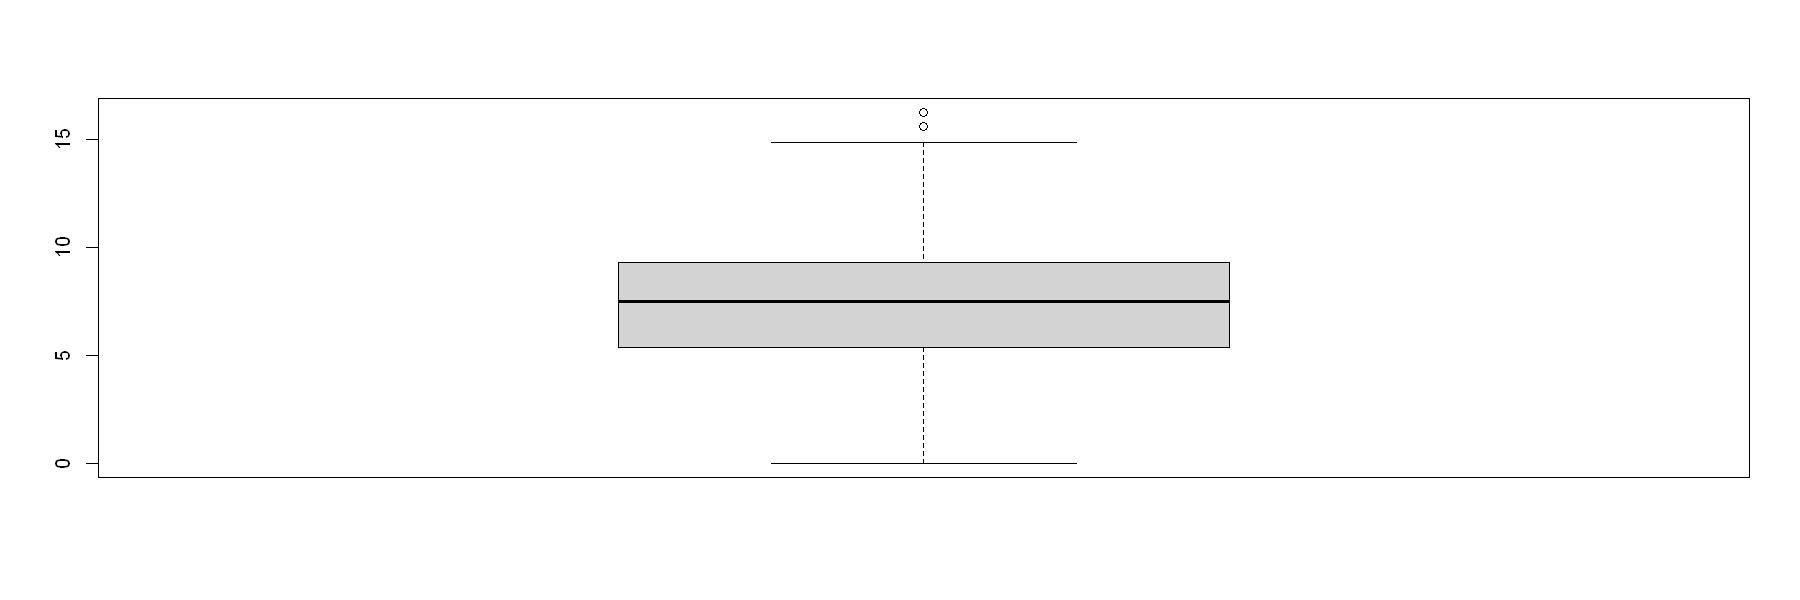

In [138]:
#the outliers cannot be there for model e because we only selected predictor 
#Urban which is a dummy variable and gives only 0 and 1 as a possible value
#and hence output can also not result in outliers

In [141]:
(predict(lm.fit,Carsseat))

1        2        3        4        5        6        7        8 
7.468191 7.468191 7.468191 7.468191 7.468191 7.563559 7.468191 7.468191 
       9       10       11       12       13       14       15       16 
7.563559 7.563559 7.563559 7.468191 7.468191 7.468191 7.468191 7.563559 
      17       18       19       20       21       22       23       24 
7.468191 7.468191 7.563559 7.468191 7.468191 7.563559 7.468191 7.468191 
      25       26       27       28       29       30       31       32 
7.468191 7.563559 7.563559 7.468191 7.468191 7.468191 7.468191 7.468191 
      33       34       35       36       37       38       39       40 
7.563559 7.468191 7.468191 7.563559 7.563559 7.468191 7.468191 7.563559 
      41       42       43       44       45       46       47       48 
7.563559 7.468191 7.468191 7.468191 7.468191 7.468191 7.563559 7.468191 
      49       50       51       52       53       54       55       56 
7.468191 7.468191 7.468191 7.468191 7.468191 7.468191 7.563559 7.468191 
      57       58       59       60       61       62       63       64 
7.468191 7.468191 7.468191 7.468191 7.468191 7.563559 7.468191 7.468191 
      65       66       67       68       69       70       71       72 
7.563559 7.563559 7.468191 7.468191 7.468191 7.468191 7.468191 7.563559 
      73       74       75       76       77       78       79       80 
7.468191 7.563559 7.563559 7.563559 7.468191 7.563559 7.468191 7.468191 
      81       82       83       84       85       86       87       88 
7.468191 7.468191 7.468191 7.468191 7.563559 7.563559 7.468191 7.563559 
      89       90       91       92       93       94       95       96 
7.468191 7.563559 7.563559 7.468191 7.468191 7.468191 7.468191 7.468191 
      97       98       99      100      101      102      103      104 
7.563559 7.468191 7.563559 7.563559 7.563559 7.468191 7.563559 7.468191 
     105      106      107      108      109      110      111      112 
7.468191 7.468191 7.563559 7.468191 7.468191 7.563559 7.468191 7.468191 
     113      114      115      116      117      118      119      120 
7.468191 7.468191 7.468191 7.468191 7.563559 7.468191 7.468191 7.468191 
     121      122      123      124      125      126      127      128 
7.468191 7.468191 7.468191 7.563559 7.468191 7.563559 7.468191 7.468191 
     129      130      131      132      133      134      135      136 
7.468191 7.563559 7.468191 7.468191 7.468191 7.468191 7.468191 7.563559 
     137      138      139      140      141      142      143      144 
7.563559 7.468191 7.468191 7.563559 7.468191 7.468191 7.468191 7.468191 
     145      146      147      148      149      150      151      152 
7.563559 7.468191 7.468191 7.563559 7.563559 7.468191 7.563559 7.563559 
     153      154      155      156      157      158      159      160 
7.563559 7.563559 7.563559 7.468191 7.468191 7.563559 7.563559 7.563559 
     161      162      163      164      165      166      167      168 
7.563559 7.563559 7.468191 7.563559 7.563559 7.468191 7.468191 7.468191 
     169      170      171      172      173      174      175      176 
7.468191 7.468191 7.468191 7.468191 7.468191 7.468191 7.563559 7.468191 
     177      178      179      180      181      182      183      184 
7.563559 7.468191 7.563559 7.468191 7.468191 7.468191 7.468191 7.468191 
     185      186      187      188      189      190      191      192 
7.563559 7.468191 7.563559 7.468191 7.468191 7.563559 7.563559 7.468191 
     193      194      195      196      197      198      199      200 
7.563559 7.468191 7.468191 7.468191 7.468191 7.468191 7.468191 7.468191 
     201      202      203      204      205      206      207      208 
7.563559 7.468191 7.563559 7.468191 7.468191 7.468191 7.468191 7.563559 
     209      210      211      212      213      214      215      216 
7.468191 7.563559 7.563559 7.468191 7.468191 7.468191 7.468191 7.468191 
     217      218      219      220      221      222      223   

In [171]:
#Exercise 15 (Chapter 3 p. 126)
#a.
exer15 <- lm(Boston$crim~.,data=Boston)
summary(exer15)


Call:
lm(formula = Boston$crim ~ ., data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-9.924 -2.120 -0.353  1.019 75.051 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  17.033228   7.234903   2.354 0.018949 *  
zn            0.044855   0.018734   2.394 0.017025 *  
indus        -0.063855   0.083407  -0.766 0.444294    
chas         -0.749134   1.180147  -0.635 0.525867    
nox         -10.313535   5.275536  -1.955 0.051152 .  
rm            0.430131   0.612830   0.702 0.483089    
age           0.001452   0.017925   0.081 0.935488    
dis          -0.987176   0.281817  -3.503 0.000502 ***
rad           0.588209   0.088049   6.680 6.46e-11 ***
tax          -0.003780   0.005156  -0.733 0.463793    
ptratio      -0.271081   0.186450  -1.454 0.146611    
black        -0.007538   0.003673  -2.052 0.040702 *  
lstat         0.126211   0.075725   1.667 0.096208 .  
medv         -0.198887   0.060516  -3.287 0.001087 ** 
---
Signif. codes:  0 '*

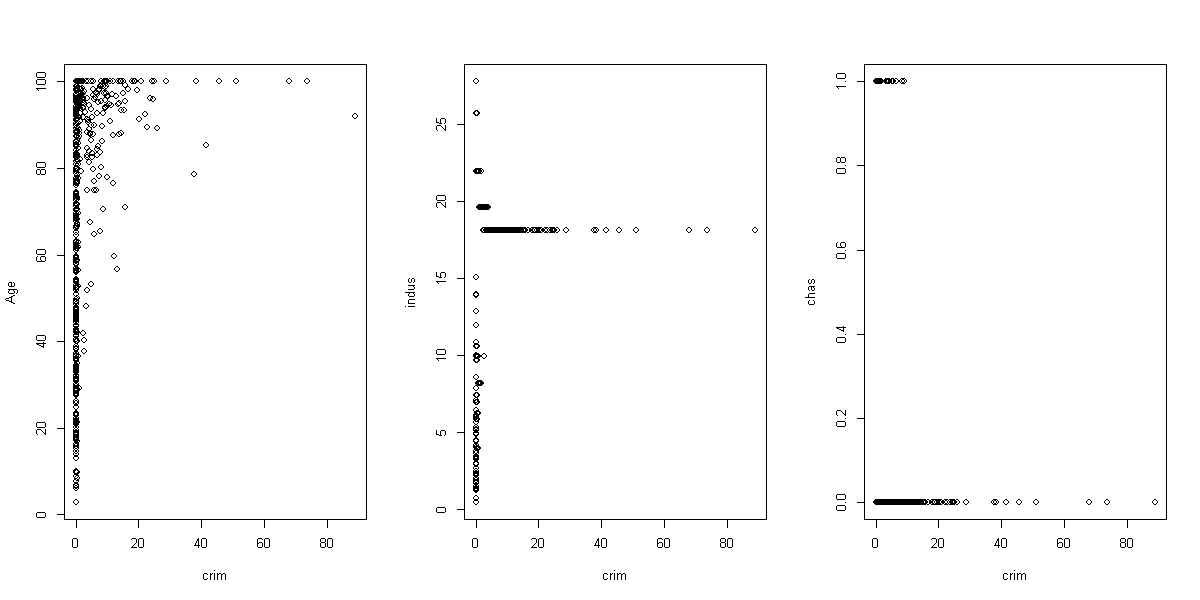

In [175]:
# Plot the data
options(repr.plot.width=10, repr.plot.height=5)  # Set plot size
par(mfrow=c(1, 3))  # Set the plot regions

plot(Boston$crim, Boston$age, ylab="Age", xlab="crim")
#abline(lm(sales ~ TV, data=adv), col='red')

plot(Boston$crim, Boston$indus, ylab="indus", xlab="crim")
#abline(lm(sales ~ radio, data=adv), col='red')

plot(Boston$crim, Boston$chas, ylab="chas", xlab="crim")
#abline(lm(sales ~ newspaper, data=adv), col='red')

In [179]:
multi <- lm(crim~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat+medv,data=Boston)
summary(multi)

Warning message in model.matrix.default(mt, mf, contrasts):
"the response appeared on the right-hand side and was dropped"
Warning message in model.matrix.default(mt, mf, contrasts):
"problem with term 1 in model.matrix: no columns are assigned"



Call:
lm(formula = crim ~ crim + zn + indus + chas + nox + rm + age + 
    dis + rad + tax + ptratio + black + lstat + medv, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-9.924 -2.120 -0.353  1.019 75.051 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  17.033228   7.234903   2.354 0.018949 *  
zn            0.044855   0.018734   2.394 0.017025 *  
indus        -0.063855   0.083407  -0.766 0.444294    
chas         -0.749134   1.180147  -0.635 0.525867    
nox         -10.313535   5.275536  -1.955 0.051152 .  
rm            0.430131   0.612830   0.702 0.483089    
age           0.001452   0.017925   0.081 0.935488    
dis          -0.987176   0.281817  -3.503 0.000502 ***
rad           0.588209   0.088049   6.680 6.46e-11 ***
tax          -0.003780   0.005156  -0.733 0.463793    
ptratio      -0.271081   0.186450  -1.454 0.146611    
black        -0.007538   0.003673  -2.052 0.040702 *  
lstat         0.126211   0.075725   1.667 0.0

In [176]:
colnames(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"